In [1]:
import sys
sys.path.append('../train/')

import math
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from util import array2mat

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
eval_set = np.load('/lmh_data/data/sclab/sclab/eval_dataset.npy', allow_pickle=True)
preds = np.load('/lmh_data/data/sclab/sclab/tmp/PDGFRA/evaluate.npy', allow_pickle=True)

In [3]:
def _process(_array, use_diag=False):
    _indexs = [0, 23, 46, 69, 92, 115, 138, 161, 184, 207, 230, 253, 276, 299, 322, 345, 368, 391, 414, 437, 460, 483]
    if not use_diag:
        _indexs = list(set(range(0, len(_array))) - set(_indexs))
    return _array[_indexs]

def mat2array(mat):
    return mat[np.triu_indices_from(mat, k=0)]

def _draw(mat, ignore_diag=True):
    fig = plt.figure(figsize=[7, 7])
    ax = fig.add_subplot()
#     ax.set_title('{}:{}-{}.{}.{}'.format(chrom, start, end, strand, cell_type))
    if ignore_diag:
        np.fill_diagonal(mat, 0)
    sns.heatmap(mat, cmap='Reds_r', square=True)

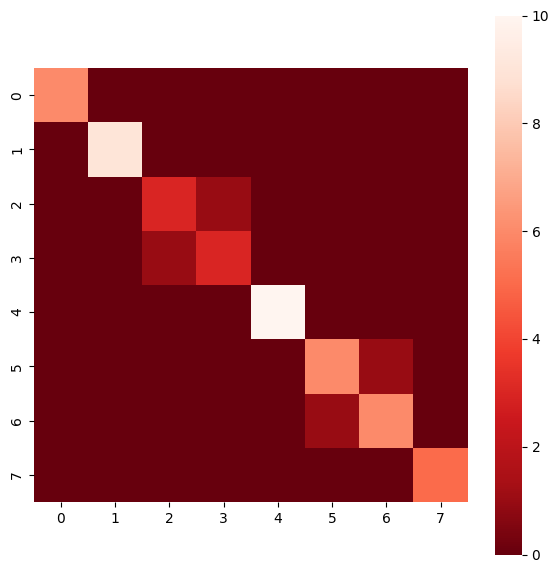

In [4]:
_target = preds[0]['target']
_draw(array2mat(_target), ignore_diag=False)

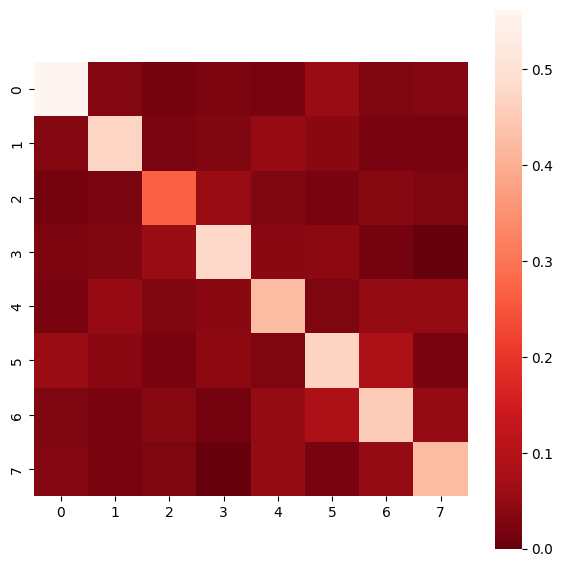

In [5]:
_predict = preds[0]['predict']
_predict += abs(_predict.min())
_draw(array2mat(_predict), ignore_diag=False)

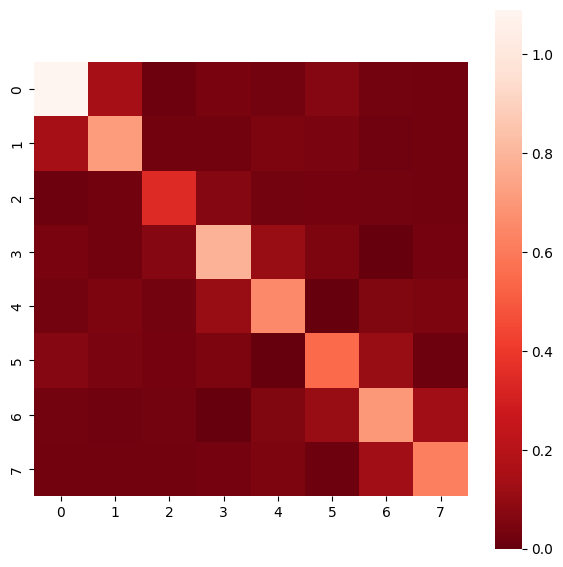

In [6]:
_predict = preds[100]['predict']
_predict += abs(_predict.min())
_draw(array2mat(_predict), ignore_diag=False)

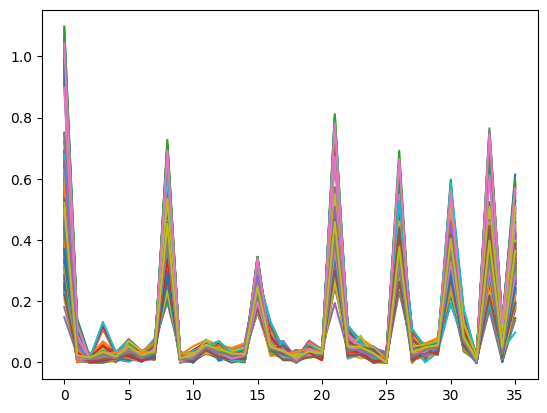

In [7]:
for pred in preds:
    _pred = pred['predict']
    _pred += abs(_pred.min())
#     _pred = _process(_pred, True)
#     _pred = np.log1p(_pred)
    plt.plot(list(range(0, _pred.shape[0])), _pred)
plt.show()

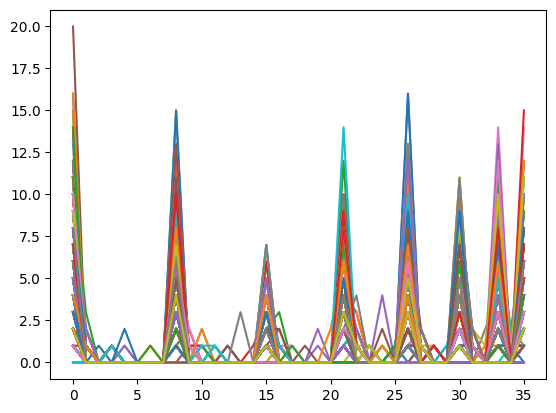

In [8]:
for pred in preds:
    _pred = pred['target']
#     _pred = _process(_pred, True)
#     _pred = np.log1p(_pred)
    plt.plot(list(range(0, _pred.shape[0])), _pred)
plt.show()

In [9]:
def show_by_cell_type(cell_type):
    _pred, _target = None, None
    num = 0
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        num += 1
        if _pred is None:
            _pred, _target = pred['predict'].copy(), pred['target'].copy()
        else:
            _pred += pred['predict']
            _target += pred['target']
    return _pred/num, _target/num

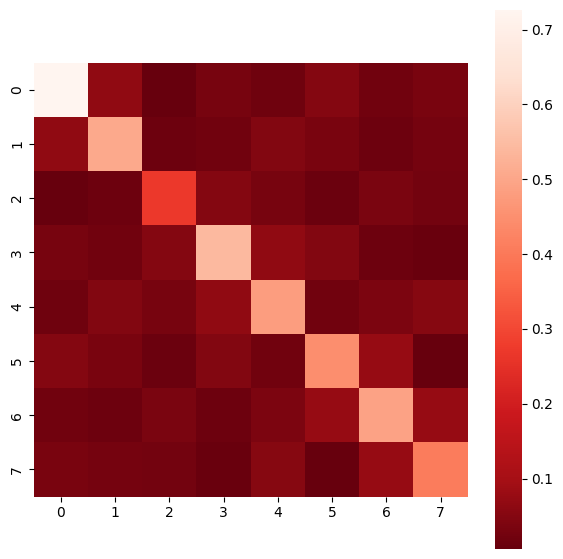

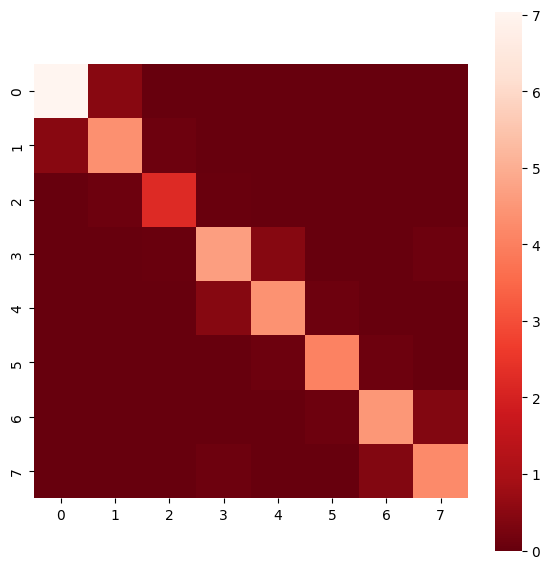

In [10]:
_pred, _target = show_by_cell_type('Astro')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

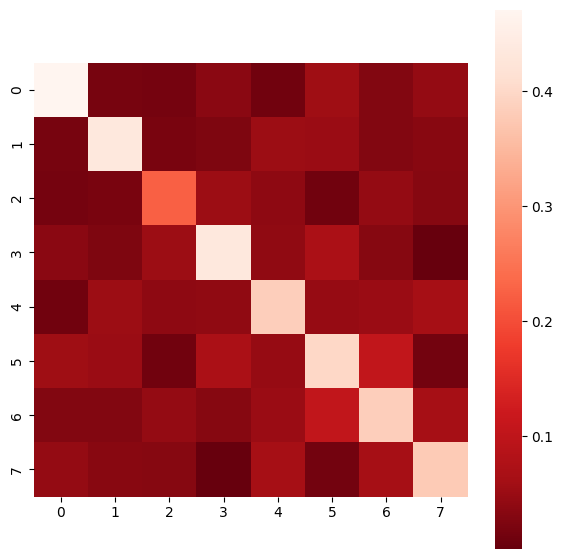

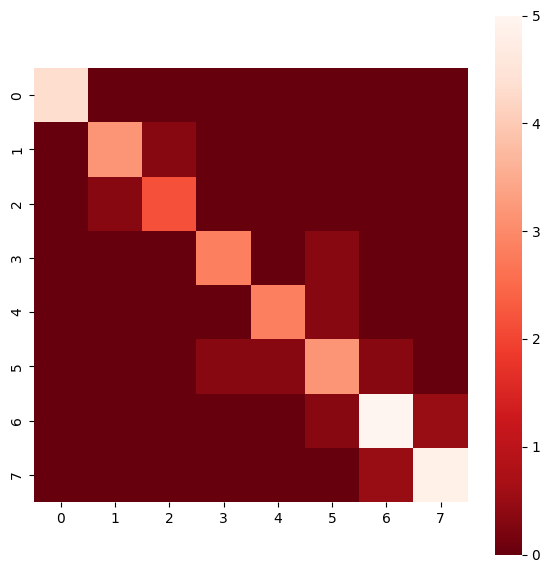

In [11]:
_pred, _target = show_by_cell_type('Endo')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

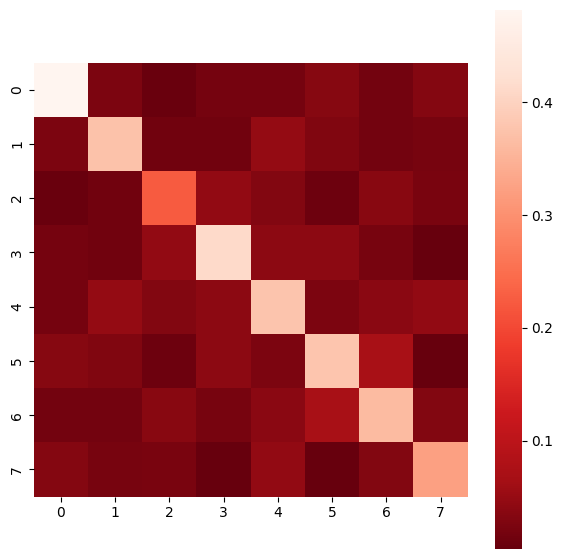

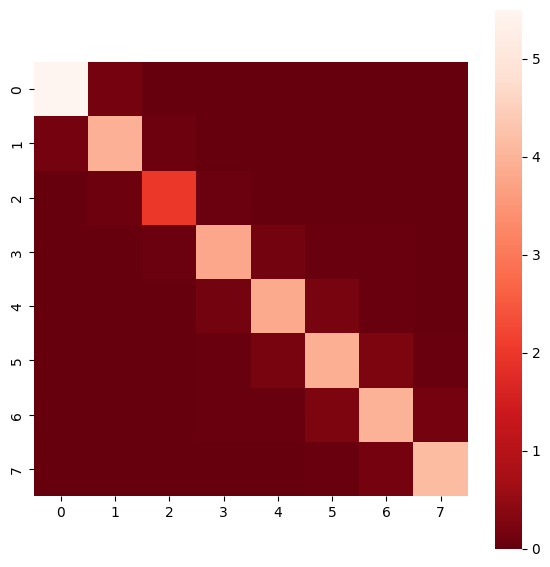

In [12]:
_pred, _target = show_by_cell_type('ODC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

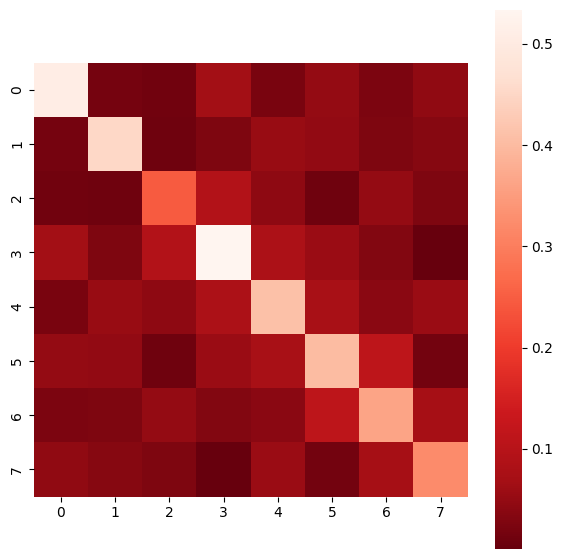

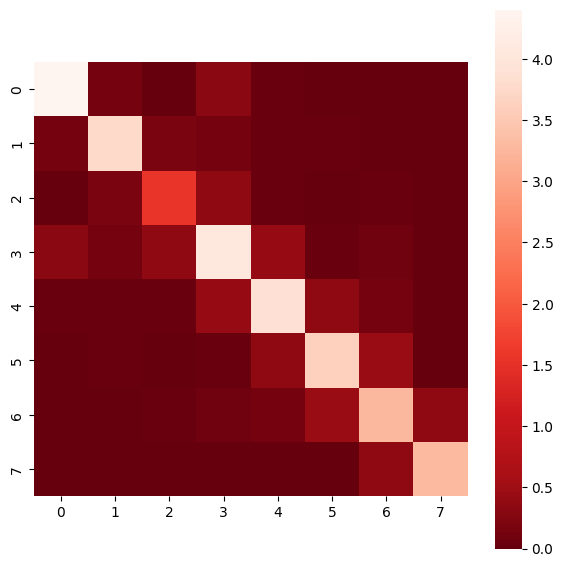

In [13]:
_pred, _target = show_by_cell_type('OPC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

In [14]:
def cal_by_cell_type(cell_type):
    _values = []
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        _values.append(stats.pearsonr(pred['predict'], pred['target'])[0])
    return _values

In [15]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.9952798116547915, pvalue=4.9240360216561634e-36)
Endo: PearsonRResult(statistic=0.9515373807117398, pvalue=5.516378707432561e-19)
ODC: PearsonRResult(statistic=0.9908079790646569, pvalue=3.965336427151416e-31)
OPC: PearsonRResult(statistic=0.9875457530033416, pvalue=6.759789328786945e-29)


In [16]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    _pred, _target = array2mat(_pred), array2mat(_target)
    np.fill_diagonal(_pred, 0)
    np.fill_diagonal(_target, 0)
    _pred, _target = mat2array(_pred), mat2array(_target)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.6097211712425903, pvalue=7.897759259656291e-05)
Endo: PearsonRResult(statistic=0.48631486383876615, pvalue=0.002635810829351521)
ODC: PearsonRResult(statistic=0.5201929713030665, pvalue=0.001145834512100587)
OPC: PearsonRResult(statistic=0.755154084886424, pvalue=1.0252462265487148e-07)


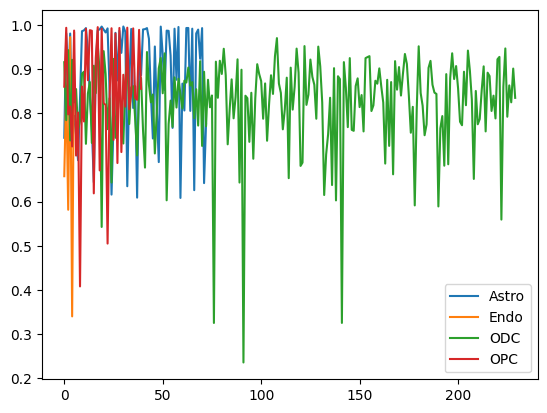

In [17]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _values = cal_by_cell_type(cell_type)
    plt.plot(list(range(0, len(_values))), _values, label=cell_type)

plt.legend()
plt.show()

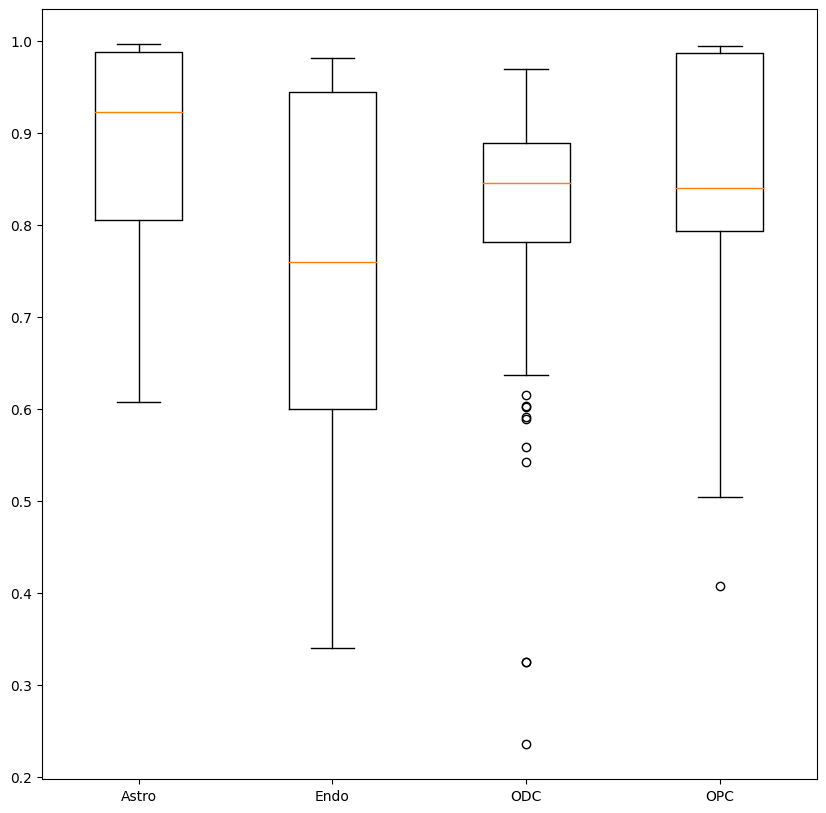

In [18]:
plot_values = [cal_by_cell_type(cell_type) for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']]
fig, ax = plt.subplots(figsize=(10,10))

ax.boxplot(plot_values, labels=['Astro', 'Endo', 'ODC', 'OPC'])

plt.show()

In [19]:
def test(cell_type):
    array = show_by_cell_type(cell_type)[0]
    mat = array2mat(array)
    np.fill_diagonal(mat, 0)
    return mat2array(mat)
plot_values = [test(cell_type) for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']]
print(stats.pearsonr(plot_values[0], plot_values[1]))
print(stats.pearsonr(plot_values[0], plot_values[2]))
print(stats.pearsonr(plot_values[0], plot_values[3]))
print(stats.pearsonr(plot_values[1], plot_values[2]))
print(stats.pearsonr(plot_values[1], plot_values[3]))
print(stats.pearsonr(plot_values[2], plot_values[3]))

PearsonRResult(statistic=0.8484749008967137, pvalue=6.365858273696775e-11)
PearsonRResult(statistic=0.8920542031459052, pvalue=2.830991959509029e-13)
PearsonRResult(statistic=0.8345600650132566, pvalue=2.531416645049649e-10)
PearsonRResult(statistic=0.9465964220463329, pvalue=2.7659249158838142e-18)
PearsonRResult(statistic=0.908860057918572, pvalue=1.8205898399406233e-14)
PearsonRResult(statistic=0.8950036037822855, pvalue=1.8095425589775852e-13)


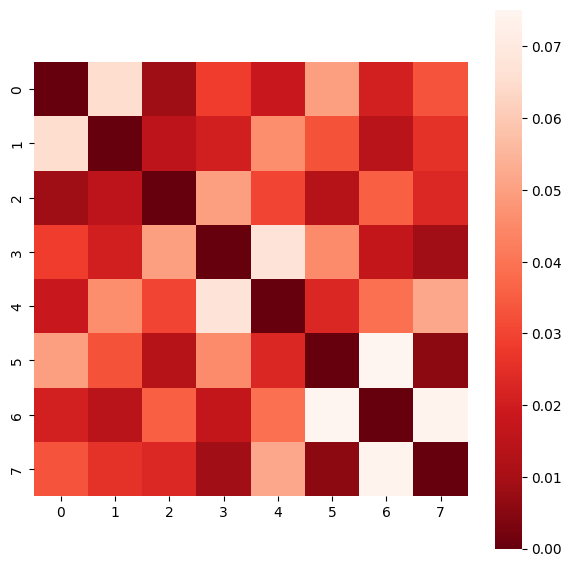

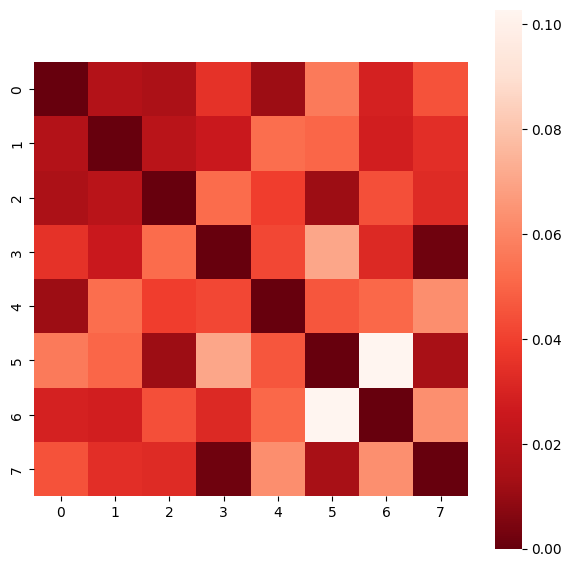

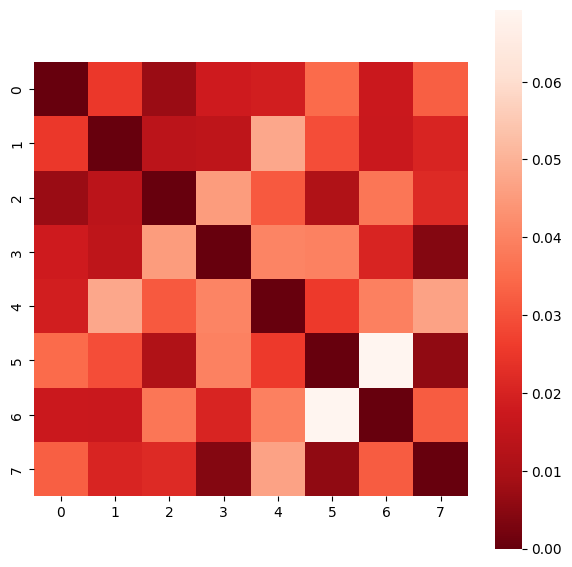

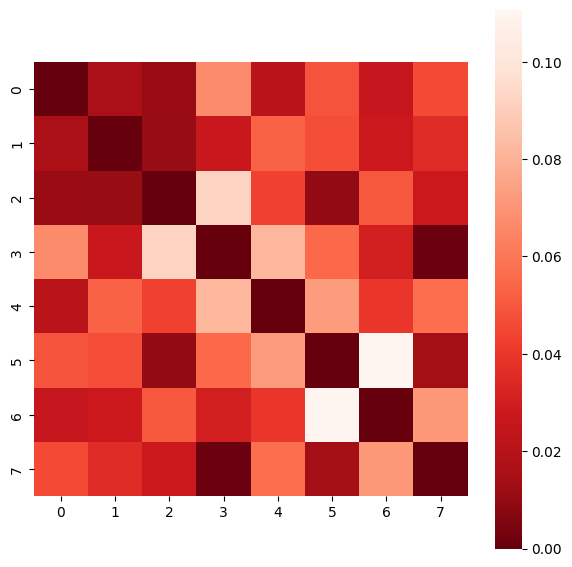

In [20]:
_draw(array2mat(show_by_cell_type('Astro')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('Endo')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('ODC')[0]), ignore_diag=True)
_draw(array2mat(show_by_cell_type('OPC')[0]), ignore_diag=True)

In [21]:
import anndata
import scanpy as sc

results, cell_types = [], []
for i in range(len(preds)):
    _pred = preds[i]['predict']
#     _pred = array2mat(preds[i]['predict'])
#     _pred = _pred[np.triu_indices_from(_pred, k=1)]
    results.append(_pred)
    cell_types.append(eval_set[i]['cell_type'])
results, cell_types = np.array(results), np.array(cell_types)

results = anndata.AnnData(X = results)
results.obs['cell_type'] = cell_types
results

AnnData object with n_obs × n_vars = 349 × 36
    obs: 'cell_type'

In [22]:
sc.tl.pca(results, n_comps=10, svd_solver="auto")
sc.pp.neighbors(results, metric="cosine")
sc.tl.umap(results)

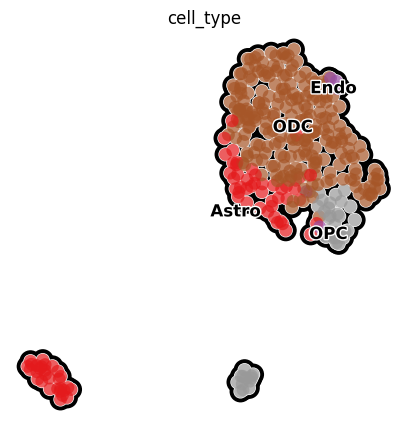

In [23]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(results, color=['cell_type'], add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2, frameon=False, palette='Set1')